In [8]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Notes Prior to Starting this Document

There are a few things in here that we will fill in the details for later, including:
<ul>
<li> Extrapolation. 
<li> Time based datasets (time series)
<li> Smoother pmf/histogram plots. 
<li> <b>Using</b> models created from our data. 
</ul>

Here we are mainly looking to see an exponential distribution in the format it will normally be seen in, and translate that real world scenario to a statistical model. 

Also, the  textbook examples show some data that is more tightly fitted to the theoretical models. These examples are intended to illustrate with real data, which sometimes doesn't fit; personally, I think dealing with the issues that may arrise with imperfect real data is good preparation in handling weird things that pop up. We <b>can</b> find or generate data that is a perfect or near perfect match to our theoretical distributions, for some people the direct match may be more illustrative; if you want to see examples like this, let me know, we can do them; more simple examples may be able to be made on the fly, more complex ones require a heads up. 

# Distributions

We looked at histograms, pmf, and cdf charts to get an idea of the distribution of our data - or how it is spread out over the range. Are most values clustered together closely? Are values fairly evenly spread out? Are there patterns? Outliers? Clusters?

Everything we've dealt with thus far has been emperical - i.e. we've taken actual data, and looked at the shape of that data to see the (actual, real life) distribution. This inheirently depends on collecting some data, and looking at it - this real world aspect has some limitations, you need to have actual data collected.  

Now we're going to look at analytical distributions - mathmatical models that represent a distribution. Analytical distributions allow us to look at/analyze/calculate things without having to collect all that data - we can use the mathmatical formula as a siplified representation of what we would expect to find if we did collect the data.

In many cases the model can pretty accurately represent the real data, and we can use the simple model to do analysis and make predictions, having faith that the data will closely mirror our calculations.

The most common and well know example of this the the normal distribution or bell curve. We can use this model to analyze may distributions we see in real life - the heights, home prices, etc from the demonstrations tend to look a lot like bell curves, as do many things in real life. 

Our goal for this one is to get a model that models (part of) COVID growth!

In [9]:
#Load some Covid Data
#Note the sep thing - that tells Pandas that the separator is a semi-colon. This is just weird data.
#In theory, the separator could be anything (it is usually a comma), just use this if it is
df = pd.read_csv("data/full_data_2.csv", sep=";")
df.head()

,Time,Infections
0,23/01/2020,1
1,24/01/2020,1
2,25/01/2020,2
3,26/01/2020,2
4,27/01/2020,5


In [10]:
#I'm going to add a "Day Number" value. This just makes it easier than using dates.
#Note: you could write a function to translate days to dates...
#The command to do this is just a Google result "dataframe add running number". I add 1 to avoid a log(0) scenario. 
df["Day"] = np.arange(len(df))
df["Day"] = df["Day"].apply(lambda x: x+ 1)
df.drop([52,53], inplace=True)
df.tail()

,Time,Infections,Day
47,10/03/2020,472,48
48,11/03/2020,696,49
49,12/03/2020,987,50
50,13/03/2020,1264,51
51,14/03/2020,1678,52


Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

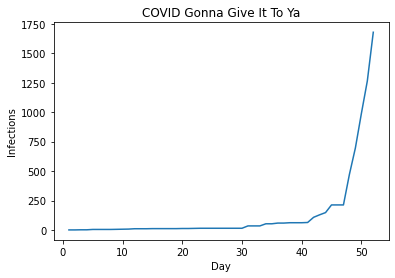

In [11]:
#Look at the growth!
sns.lineplot(data=df, x="Day", y="Infections")

plt.title('COVID Gonna Give It To Ya')

Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

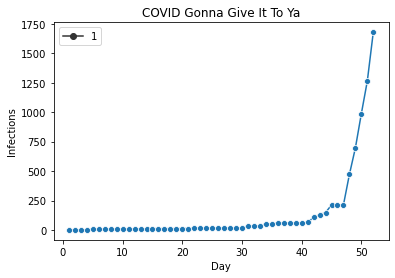

In [12]:
# With points!
sns.lineplot(data=df, x="Day", y="Infections", style=1, markers=True)
plt.title('COVID Gonna Give It To Ya')

### CDF to See Distribution

This certainly looks like exponential growth. 

What we are looking at there ISN'T a distribution though, this is a scatter plot (we'll look at this soon) that shows two variables, time and infections. Distributions show one variable at a time, in this case, just infections. We can focus our attention to the infections data. 

<b>For exponential distributions this type of thing is common, we are so used to look at them mapped against time, that we don't consider time as a separate variable. In the normal stuff we didn't have to do this separation as each variable is "more separate" as compared to the time/count graph we normally get for time.</b>

We can make a CDF of our exponential distribution, and see if it matches our expectations...

{'xscale': 'linear', 'yscale': 'linear'}

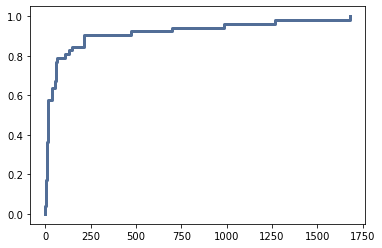

In [13]:
inf_cdf = thinkstats2.Cdf(df["Infections"])
thinkplot.Cdf(inf_cdf)

Or with the sns version. The ecdf plot is a cummulative distribution plot from seaborn, to find it I Googled "seaborn cummulative distribution" and the documentation page was the first link. There are examples near the bottom that I could adapt. Copy and adjust - borrowing and tweaking code that is similar to what you want is good, efficient if you have semi-repetitive or standardized tasks (like data analysis in places), aren't able to code things off the top of your head, or are learning to tackle new problems. (Near) plagarism is desired. 

<AxesSubplot:xlabel='Infections', ylabel='Proportion'>

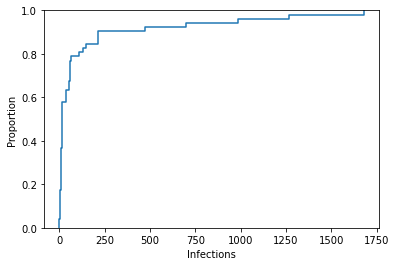

In [14]:
sns.ecdfplot(data=df["Infections"])

We can look at an actual CDF of an analytical distribution. The scale here is the standard deviation and the loc is the mean - sometimes scipy uses different names, and aren't that clear in the documentation. 

<AxesSubplot:ylabel='Proportion'>

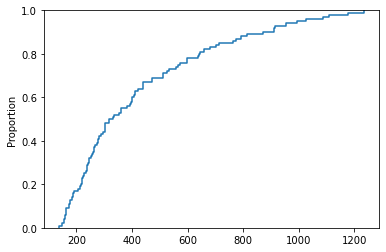

In [15]:
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(df["Infections"]), loc=np.mean(df["Infections"])))

All together now...

<AxesSubplot:ylabel='Proportion'>

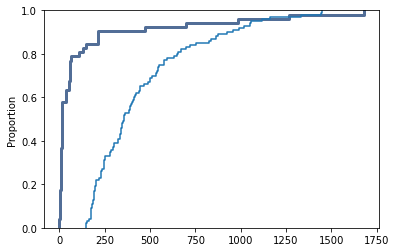

In [16]:
inf_cdf = thinkstats2.Cdf(df["Infections"])
thinkplot.Cdf(inf_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(df["Infections"]), loc=np.mean(df["Infections"])))

And if we look at the PMF to see the "normal" distribution. 

In [17]:
# Make a PMF



##### ....Ugh... Not Spectacular

This is an illustration of one of the reasons that CDFs can be useful in comparing distributions. We can break it down:
<ul>
<li> If we look back up to the line plots, as we look towards the right side of the chart, in the climb, we obviously aren't taking on every value. One of exponential growth's things is jumping quickly. 
<li> Those values that are skipped, aren't in the distribution, so if we plot them on a histogram, or in this case - a PMF, there's nothing there, as they never occur. 
<li> A cummulative distribution doesn't have the same impact from this, the flat parts of the cummulative graph correspond to the zero parts of the PMF. In the CDF though, the pattern of the distribution just becomes somewhat more blocky, but maintains the same basic shape. 
    <ul>
    <li> Binning also addresses this, but if we look at the actual value for number of infections, try to think of a bin size that makes sense for this situation. Test a few
    </ul>
</ul>

So this CDF comparison is another tool in our toolkit - we don't need to use it, but when it does the job better, then we should. 

We'll also have different tools to deal with plotting distribution data soon. 

### Exponential Distributions

The data looks like it shows an exponential distribution, more or less, and a steeply distributed one at that. Just like with the normal distribution that we can almost always eyeball against a histogram or pmf, this exponential distribution is pretty easy to pattern via the CDF. Each method is valid, it depends on the situation. 

## Exercise - Part #1

Use this data to:
<ul>
<li> Generate a CDF for the emperical data. 
<li> Generate a CDF for the equivalent analytical distribution.
<li> Do they seem to match? 
</ul>

In [33]:
ex = pd.read_csv("data/expon.csv")


In [19]:
# Graphical comparison


## Transformations - A Brief and Gentle Introduction

One other thing we can do to match analytical distributions is to use <b>transformations</b> to make the data easier to deal with. Transformations are simply things that we can do to change, or transform, our data into a more usable format. This is common is some situations because certain things are just easier if the data is changed, particularly if it is changed into a known distribution later on. 

### Axis Scaling

Looks pretty exponential! 

What if we were to make the y axis into a logarithmic scale. Why?
<ul>
The original formula is y = s * b^x:
    <ul>
    <li>y = # infections
    <li>s = initial number of people infected
    <li>b = infections generated per infected person. (Growth Rate)
    <li>x = days in
    </ul>
</ul>
Taking the log of both sides and looking at in on that scale looks a little different....
y = log(s) + log(b) * x
Note: the y stays y, and not log(y) when we graph it, because of that log scale.

This is a transformation to the axis, which serves to "eliminate" the exponential curve, leaving us with a line. 
<b>This is now a linerar function! y=mx+b</b>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


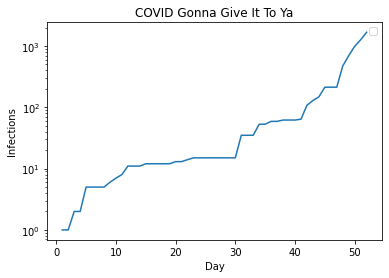

In [34]:
plt.title('COVID Gonna Give It To Ya')
sns.lineplot(data=df, x="Day", y="Infections")
plt.yscale('log')
plt.legend()

#### Test for Exponential

Now the line is kind of straight. The more straight it is, the "better". 

The closer this curve is to a line, the closer the real data is to exponential. Why...

In [35]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
y = np.log(df["Infections"])
x = df["Day"]
m,b=np.polyfit(x, y, 1, w=np.sqrt(y))
y_fit=np.exp(m*x+b)
print(m)
print(b)


0.11748262946936426
0.18488346106582226


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


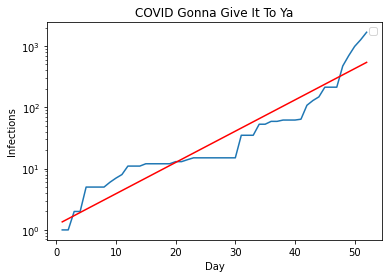

In [22]:
#Show best fit line on graph.
plt.title('COVID Gonna Give It To Ya')
sns.lineplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.yscale('log')
plt.legend()

Why? After the log transformation a straight line that we generated is a "perfect" exponential function - if we undid the log operation, we'd get that as a result. Our transformed data is a drunken stumble version of an exponential distribution (we know this, because we looked at the math above). The closer the emperical data is to the analytical version, the better a fit that analytical version is, just like the normal data vs a prbability plot. 

#### Our Data and its Analytical Match

What does all this mean? These general points are important! 

One of the uses of analytical models is to give us a simplied model that we can use to examine real data. 
The closer the data is to the model, the better it "fits". This allows us to utilize all that we know about that distribution to add to what we know from our data - if we know that our data follows a certain distribution (determined by matching our data to an analytical distribution) with certain parameters (measured from our emperical data), we can use this to do things like make predictions and generalizations based on a small(ish) emperical sample. We "know" the data will be distributed in a certain way, so all we need to do is adapt that to our specific inputs. 

Matching the distribution seen in our data to a known analytical distribution is a very important concept, especially as we move on to inferential (using stats to make predictions) statistics going forward. This is also why we can generalize things like polling from a small sample. We know, mathmatically, what to expect from an analytical distribution, so if we can "fit" our data to one of these distributions, we can use all that knowledge to draw conclusions on our data. 

Things like the log scale for exponential functions give us a way to look for fit. There's visual and analytical methods. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


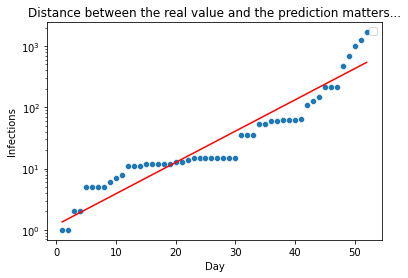

In [23]:
#Show best fit line on graph.
plt.title('Distance between the real value and the prediction matters...')
sns.scatterplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.yscale('log')
plt.legend()

## Exercise - Part 2

Plot the log-transformed version of the plot of the data. 

In [24]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
ex_y = np.log(ex["Value"])
ex_x = ex["Index"]
ex_m, ex_b = np.polyfit(ex_x, ex_y, 1, w=np.sqrt(ex_y))
ex_fit=np.exp(ex_m * ex_x + ex_b)

In [25]:
# Plot

##### Exercise Findings

It looks like a good match early, then splits a bit at the end. 

### Analytical Predictions

We can "undo" the log part to see our new predictions! They aren't awesome, but we just started. 

The closer of a match that we can get of an analytical distribution to our emperical distribution, the more that analytical distribution will help us make generalizations. There are a few things we can do to improve this match:
<ul>
<li> Increase sample size - if possible, adding more sample data will allow us to better and more accurately match to an analytical distribution. 
<li> Use transformations - things like logs to make skewed normal distributions normal can help manipulate data to more closely match an analytical distribution. 
<li> Choose different distributions - we will look at a few, there are many. While the bulk of scenarios can be captured with a handful of distributions (normal, lognormal, exponential, pareto, etc...), there are a bunch that may fit your data. 
<li> Balance fit to the model - this is a concept that we'll revisit heavily when doing machine learning. In short, we want an analytical model that follows the same pattern as our emperical distribution - but is not <b>so</b> tailored to the data that it does things like follow singular outliers to the detriment of the overall fit. 
</ul>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


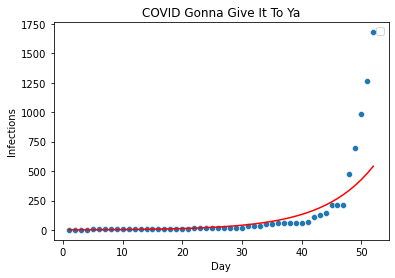

In [26]:
plt.title('Distance between the real value and the prediction matters...')
sns.scatterplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.title('COVID Gonna Give It To Ya')
plt.legend()

## Generate Exponential Dataset - You Can Ignore From Here Down

<AxesSubplot:ylabel='Proportion'>

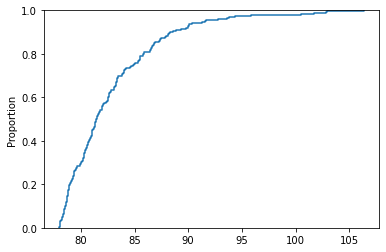

In [27]:
a = scipy.stats.expon.rvs(size=250, scale=5, loc=78)
a.sort()
sns.ecdfplot(a)

In [28]:
b = np.linspace(0,249,250)
#b

In [29]:
c = np.random.rand(1,250)*3
#c[0]

In [30]:
d = a + c[0]
d.sort()
#print(d)

In [31]:
tmp_df = pd.DataFrame([b,a]).T
tmp_df.columns = ["Index", "Value"]
tmp_df.sort_values(ascending=True, inplace=True, by="Value")
tmp_df.tail()

,Index,Value
245,245.0,100.493864
246,246.0,101.723872
247,247.0,102.845621
248,248.0,102.959992
249,249.0,106.354352


In [32]:
tmp_df.head(230).to_csv("data/expon.csv", index=False)